 I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease
 
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Target:0=no heart disease,1= heart disease

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data=pd.read_csv("heart.csv")


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [31]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
columns=["age","trestbps","chol","thalach","oldpeak"]
data[columns]=scale.fit_transform(data[columns])

In [32]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [33]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.35)

### Decision Tree Before Pruning

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

[Text(718.6363636363636, 774.63, 'X[12] <= 2.5\ngini = 0.497\nsamples = 196\nvalue = [90, 106]'),
 Text(369.8863636363636, 693.09, 'X[11] <= 0.5\ngini = 0.366\nsamples = 116\nvalue = [28, 88]'),
 Text(253.63636363636363, 611.55, 'X[3] <= 1.478\ngini = 0.195\nsamples = 82\nvalue = [9, 73]'),
 Text(211.36363636363637, 530.01, 'X[9] <= 2.166\ngini = 0.14\nsamples = 79\nvalue = [6, 73]'),
 Text(169.0909090909091, 448.47, 'X[7] <= -2.893\ngini = 0.12\nsamples = 78\nvalue = [5, 73]'),
 Text(126.81818181818181, 366.93, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(211.36363636363637, 366.93, 'X[8] <= 0.5\ngini = 0.098\nsamples = 77\nvalue = [4, 73]'),
 Text(126.81818181818181, 285.39, 'X[3] <= -1.292\ngini = 0.029\nsamples = 68\nvalue = [1, 67]'),
 Text(84.54545454545455, 203.85000000000002, 'X[7] <= 0.431\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(42.27272727272727, 122.31000000000006, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(126.81818181818181, 122.31000000000006, 'gin

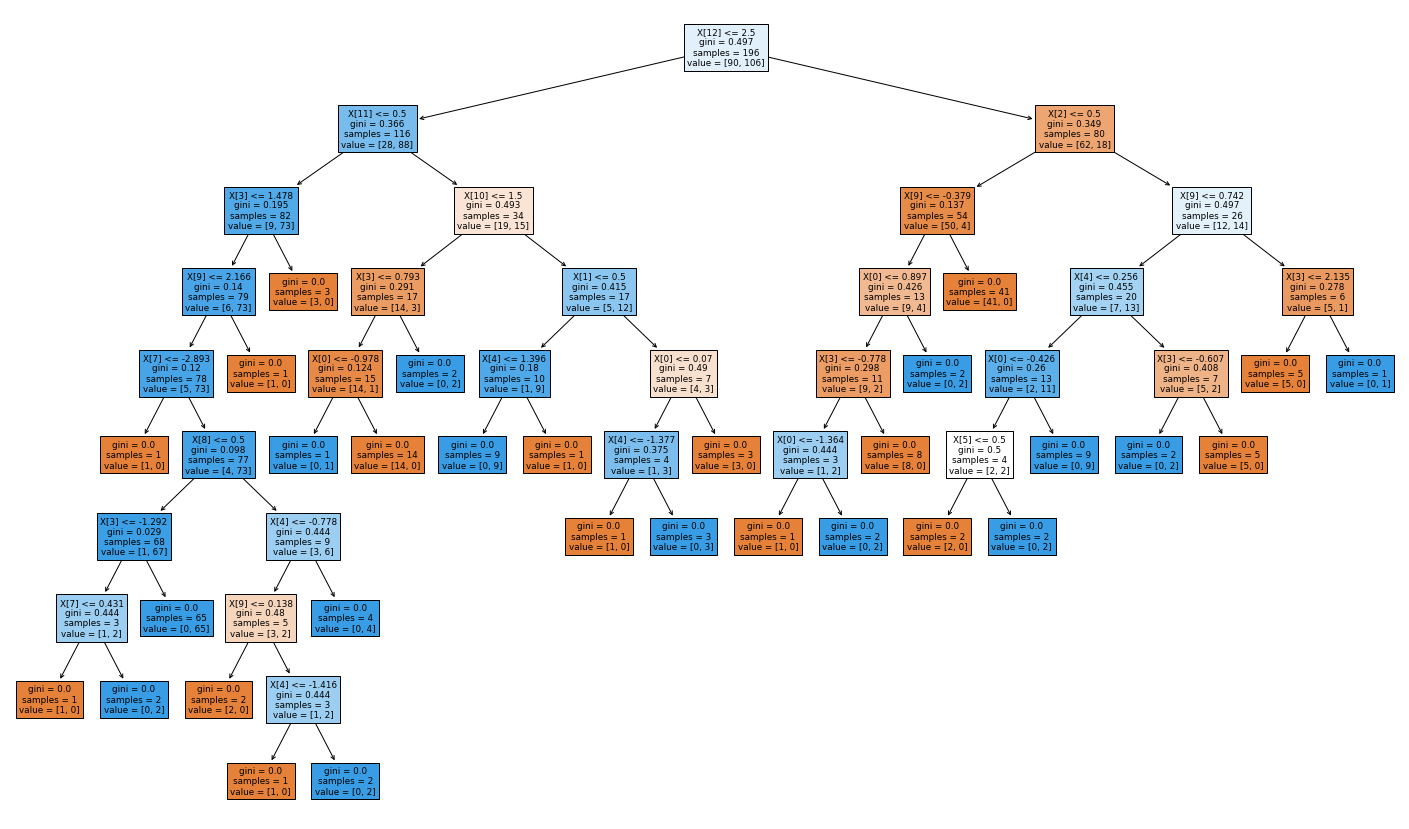

In [43]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

From above, we can see that the number of nodes and depth is much and this could lead to over-fitting

In [44]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.6635514018691588


The accuracy score before pruning is 66.3%

# Pruning the Decision Tree Classifier
## Selecting the best ccp_alpha for pruning using cost complexity pruning method

In [45]:
prune = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = prune.ccp_alphas, prune.impurities

In [46]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13757234772867633


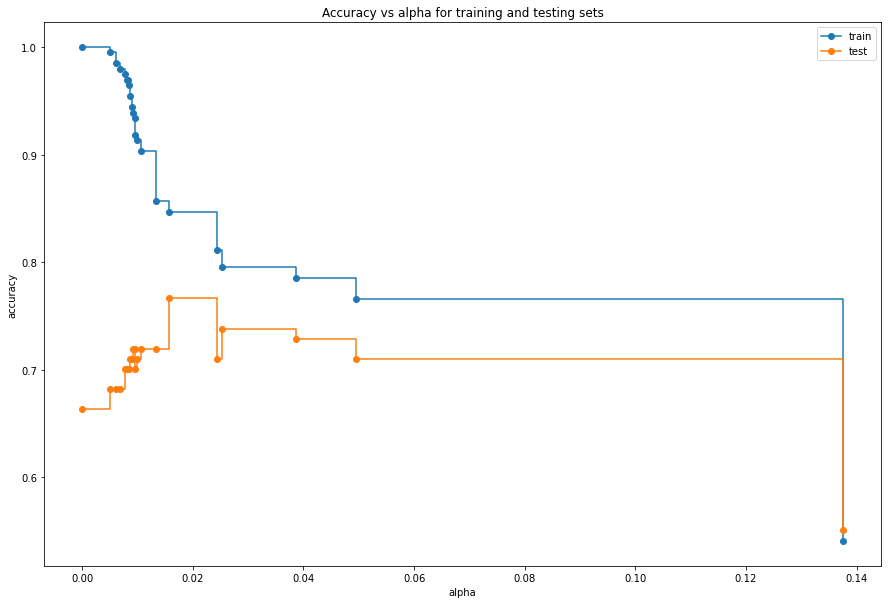

In [48]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


from above, the ccp_alpha at which the model generalises is slightly above 0.02

In [59]:
model2=DecisionTreeClassifier(random_state=0,ccp_alpha=0.027)
model2.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.027, random_state=0)

In [60]:
y_pred2=model2.predict(X_test)

[Text(697.5, 679.5, 'X[12] <= 2.5\ngini = 0.497\nsamples = 196\nvalue = [90, 106]'),
 Text(348.75, 407.69999999999993, 'X[11] <= 0.5\ngini = 0.366\nsamples = 116\nvalue = [28, 88]'),
 Text(174.375, 135.89999999999998, 'gini = 0.195\nsamples = 82\nvalue = [9, 73]'),
 Text(523.125, 135.89999999999998, 'gini = 0.493\nsamples = 34\nvalue = [19, 15]'),
 Text(1046.25, 407.69999999999993, 'X[2] <= 0.5\ngini = 0.349\nsamples = 80\nvalue = [62, 18]'),
 Text(871.875, 135.89999999999998, 'gini = 0.137\nsamples = 54\nvalue = [50, 4]'),
 Text(1220.625, 135.89999999999998, 'gini = 0.497\nsamples = 26\nvalue = [12, 14]')]

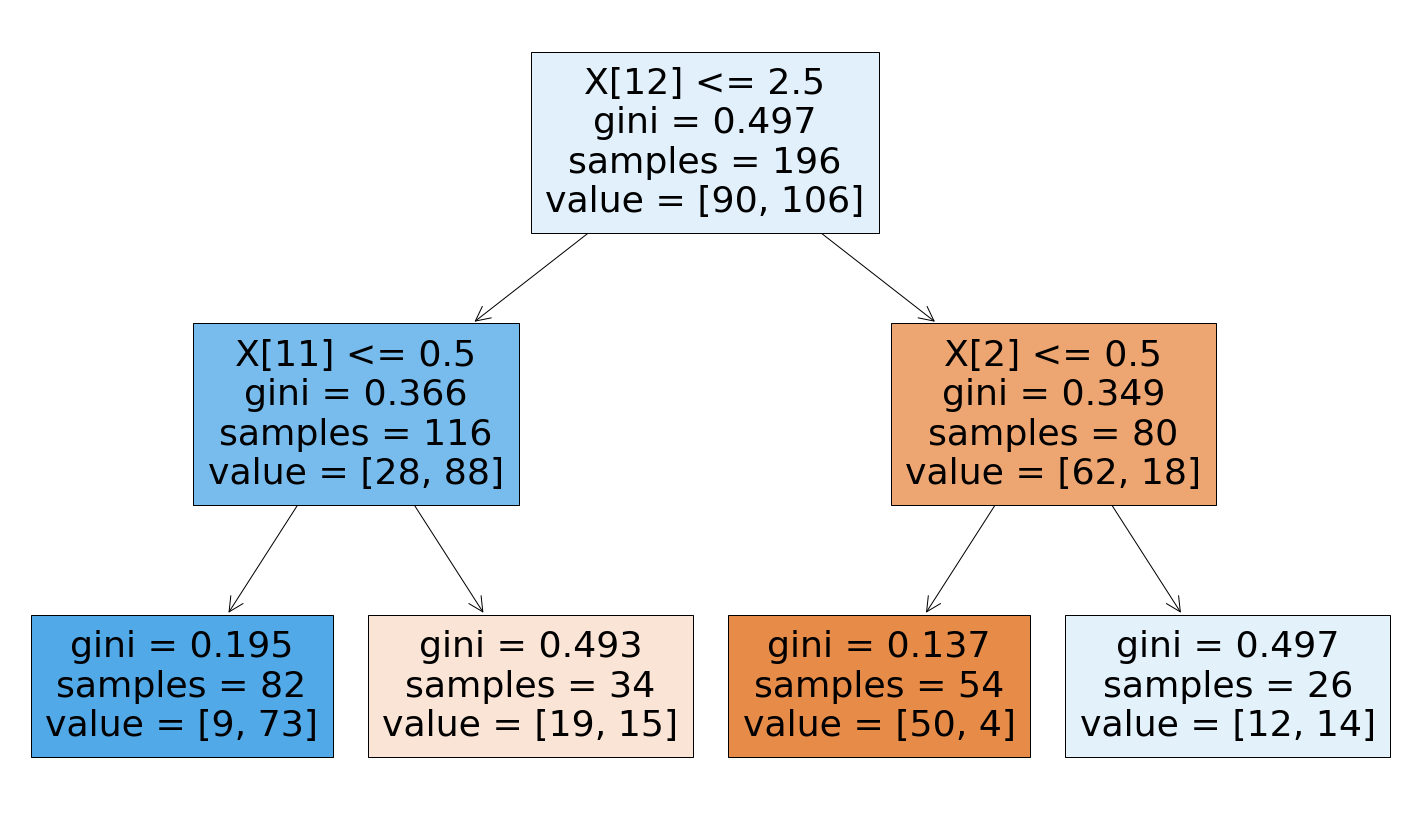

In [61]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(model2,filled=True)

After Pruning, the number of depths and nodes has reduced significantly. Thus, reducing the risk of overfitting

In [62]:
score2=accuracy_score(y_test,y_pred2)
print(score2)

0.7383177570093458


### After pruning, the accuracy score has increased from 66.3% to 73.8%. This might not be the best model for this dataset but it does shows the effect of pruning a decision tree classifier<br />
More research on a better model will be done in the nearest future